In [4]:
import os
import pandas as pd

print(os.getcwd())

os.chdir('C:\\Users\\Ana Valls\\Desktop\\CURSO BIG DATA\\IBM\\Python For Data Science\\Proyecto 1')  

df = pd.read_csv('ventas.csv')

print(df.head())



c:\Users\Ana Valls\Desktop\CURSO BIG DATA\IBM\Python For Data Science\Proyecto 1
        Fecha    Producto  Ingresos
0  2023-01-01  Producto A      1000
1  2023-01-01  Producto B      1500
2  2023-02-01  Producto A      1200
3  2023-02-01  Producto C       700
4  2023-03-01  Producto B      1800


In [5]:
df = df.dropna()

df['Fecha'] = pd.to_datetime(df['Fecha'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     6 non-null      datetime64[ns]
 1   Producto  6 non-null      object        
 2   Ingresos  6 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 276.0+ bytes


In [6]:
df.describe()


,Fecha,Ingresos
count,6,6.000000
mean,2023-01-31 00:00:00,1216.666667
min,2023-01-01 00:00:00,700.000000
25%,2023-01-08 18:00:00,1025.000000
50%,2023-02-01 00:00:00,1150.000000
75%,2023-02-22 00:00:00,1425.000000
max,2023-03-01 00:00:00,1800.000000
std,NaN,386.867764


In [7]:
ventas_por_producto = df.groupby('Producto')['Ingresos'].sum().reset_index()
print(ventas_por_producto)

df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('Mes')['Ingresos'].sum().reset_index()
print(ventas_mensuales)


     Producto  Ingresos
0  Producto A      2200
1  Producto B      3300
2  Producto C      1800
       Mes  Ingresos
0  2023-01      2500
1  2023-02      1900
2  2023-03      2900


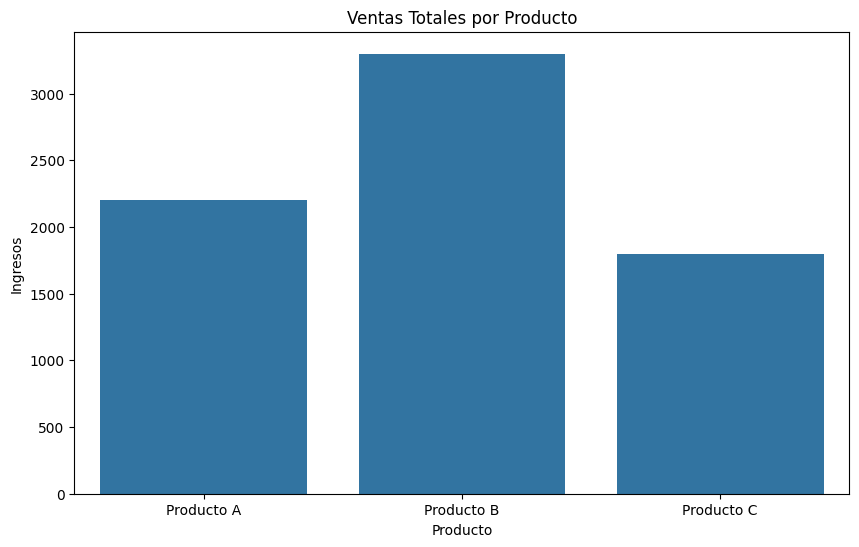

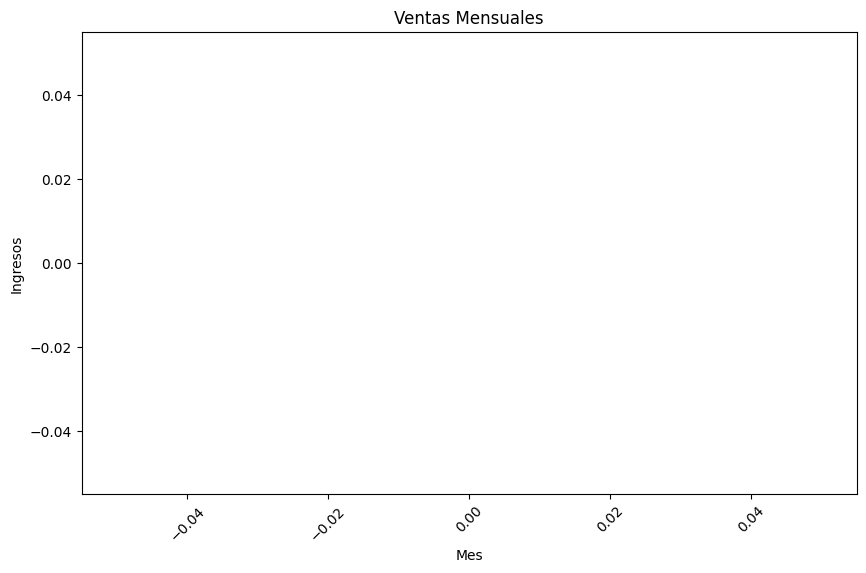

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ventas_por_producto['Ingresos'] = pd.to_numeric(ventas_por_producto['Ingresos'], errors='coerce')

ventas_mensuales['Mes'] = pd.to_datetime(ventas_mensuales['Mes'], errors='coerce')
ventas_mensuales['Ingresos'] = pd.to_numeric(ventas_mensuales['Ingresos'], errors='coerce')

ventas_por_producto.dropna(subset=['Ingresos'], inplace=True)
ventas_mensuales.dropna(subset=['Mes', 'Ingresos'], inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_producto, x='Producto', y='Ingresos')
plt.title('Ventas Totales por Producto')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='Mes', y='Ingresos')
plt.title('Ventas Mensuales')
plt.xticks(rotation=45)
plt.show()
